# K-Nearest Neighbors Classification

In [2]:
import numpy as np


In [3]:
a = np.random.rand(3,4)

In [4]:
a

array([[0.71586856, 0.75192521, 0.40621468, 0.20611482],
       [0.35811691, 0.08690592, 0.78568731, 0.44342797],
       [0.21085966, 0.44498901, 0.71067225, 0.95343535]])

In [5]:
# res = 0
# for j in range(D):
#     res += (a[j] - b[j])**2
# sqrt(res)


def euclidian_distance(a, b):
    return np.sqrt(np.sum((a-b)**2, axis=1))

In [6]:
x = np.random.rand(1, 2)
y = np.random.rand(1, 2)
print(x)
print(y)
euclidian_distance(x, y)

[[0.44907488 0.56459091]]
[[0.44333963 0.26413596]]


array([0.30050968])

In [7]:
def score(X_test, y_test):
    y_pred = predict(X_test)
        
    return float(sum(y_pred == y_test))/ float(len(y_test))

In [8]:
class KNearestNeighbors():
    def __init__(self, X_train, y_train, n_neighbors=5, weights='uniform'):

        self.X_train = X_train
        self.y_train = y_train

        self.n_neighbors = n_neighbors
        self.weights = weights

        self.n_classes = len(np.unique(y_train))

    def euclidian_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2, axis=1))

    def kneighbors(self, X_test, return_distance=False):

        dist = []
        neigh_ind = []

#         print(X_test, self.X_train. X_test, self.X_train)
        point_dist = []
        for x_test in X_test:
            point_dist += [ self.euclidian_distance(x_test, self.X_train) ]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh,
                                  key=lambda x: x[1])[:self.n_neighbors]

            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]

            dist.append(dist_list)
            neigh_ind.append(ind_list)

        if return_distance:
            return np.array(dist), np.array(neigh_ind)

        return np.array(neigh_ind)

    def predict(self, X_test):

        if self.weights == 'uniform':
            neighbors = self.kneighbors(X_test)
            y_pred = np.array([
                np.argmax(np.bincount(self.y_train[neighbor]))
                for neighbor in neighbors
            ])
            #print("Y_pred: ", y_pred)
            return y_pred

        if self.weights == 'distance':
            # Métrica inventada: combina potencias y logaritmos de las diferencias absolutas
            def invented_distance(x, y):
                # Ejemplo: sqrt(|x1-y1|^3 + log(1+|x2-y2|^2) + sum(|xi-yi|^1.5))
                diff = np.abs(x - y)
                # Para cada muestra, calcular la métrica inventada
                # Asume que hay al menos 2 atributos
                d1 = diff[0]**3
                d2 = np.log(1 + diff[1]**2)
                d_rest = np.sum(diff[2:]**1.5) if diff.shape[0] > 2 else 0
                return np.sqrt(d1 + d2 + d_rest)

            y_pred = []
            for x in X_test:
                # Calcular distancias de x contra todos los puntos de entrenamiento
                distances = np.array([invented_distance(x, x_train) for x_train in self.X_train])

                # Seleccionar índices de los k vecinos más cercanos
                neigh_ind = np.argsort(distances)[:self.n_neighbors]
                neigh_dist = distances[neigh_ind]

                # Evitar divisiones por cero
                epsilon = 1e-8
                weights = 1 / (neigh_dist + epsilon)

                # Acumular pesos por clase
                class_weights = np.zeros(self.n_classes)
                for idx, cls in enumerate(self.y_train[neigh_ind]):
                    class_weights[cls] += weights[idx]

                # Predecir la clase con mayor peso acumulado
                y_pred.append(np.argmax(class_weights))

            return np.array(y_pred)


    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return float(sum(y_pred == y_test)) / float(len(y_test)), y_pred, y_test


# Iris dataset (Observations/Treatments)

In [77]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import time
from matplotlib import pyplot as plt
dataset = datasets.load_iris(as_frame=True)


X = dataset.data
y = dataset.target


In [78]:
X.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [79]:
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

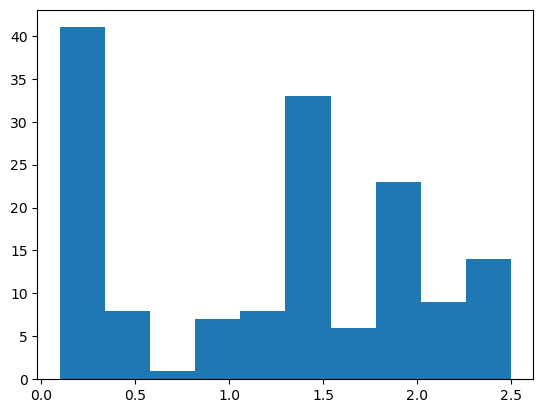

In [80]:
plt.hist(X['petal width (cm)'],10)
plt.show()

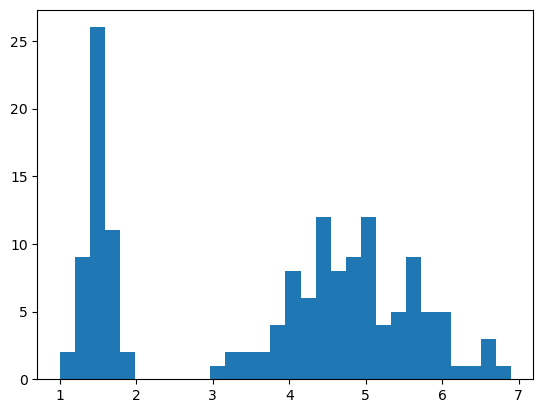

In [81]:

plt.hist(X['petal length (cm)'],30)
plt.show()

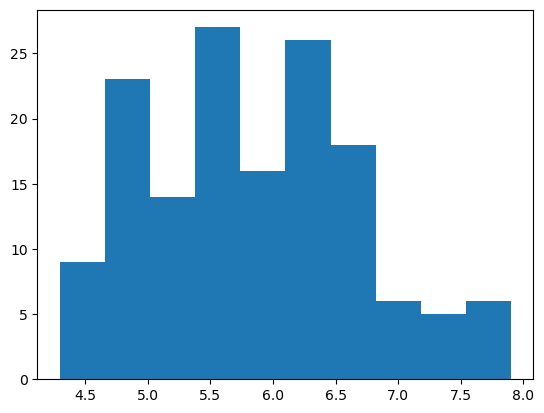

In [82]:

plt.hist(X['sepal length (cm)'],10)
plt.show()

In [83]:
mu = np.mean(X, 0)
sigma = np.std(X, 0)
X = (X - mu ) / sigma

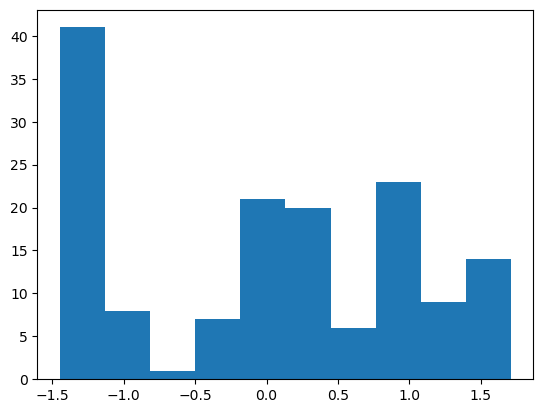

In [84]:
plt.hist(X['petal width (cm)'],10)
plt.show()

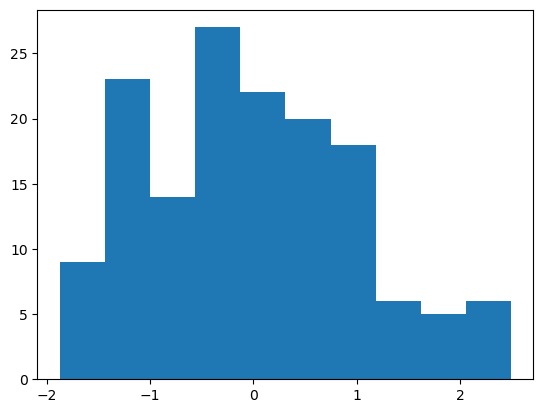

In [85]:
plt.hist(X['sepal length (cm)'],10)
plt.show()

In [86]:
dataset.target_names, dataset.feature_names


(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [87]:
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
    y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3,stratify=y, random_state=45)



our_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=8)
sklearn_classifier = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)

our_accuracy, y_pred, y_test = our_classifier.score(X_test, y_test)
sklearn_accuracy = sklearn_classifier.score(X_test, y_test)

print(y_pred[:20], y_test[:20])

pd.DataFrame([[our_accuracy, sklearn_accuracy]],
             ['Accuracy'],    
             ['Our Implementation', 'Sklearn\'s Implementation'])

[1 0 2 0 0 2 0 2 1 0 1 1 1 0 1 2 1 0 1 2] [1 0 2 0 0 2 0 2 1 0 1 1 1 0 2 2 1 0 1 2]


,Our Implementation,Sklearn's Implementation
Accuracy,0.911111,0.911111


k=2 | Our accuracy: 0.9111 | Sklearn accuracy: 0.8667 | Our time: 0.0658s | Sklearn time: 0.0036s
k=3 | Our accuracy: 0.9333 | Sklearn accuracy: 0.9333 | Our time: 0.0625s | Sklearn time: 0.0035s
k=4 | Our accuracy: 0.9333 | Sklearn accuracy: 0.9333 | Our time: 0.0633s | Sklearn time: 0.0038s
k=5 | Our accuracy: 0.9333 | Sklearn accuracy: 0.9333 | Our time: 0.0645s | Sklearn time: 0.0039s
k=6 | Our accuracy: 0.9333 | Sklearn accuracy: 0.9111 | Our time: 0.0716s | Sklearn time: 0.0034s
k=7 | Our accuracy: 0.9333 | Sklearn accuracy: 0.9333 | Our time: 0.0673s | Sklearn time: 0.0040s
k=9 | Our accuracy: 0.9333 | Sklearn accuracy: 0.9333 | Our time: 0.0640s | Sklearn time: 0.0043s
k=11 | Our accuracy: 0.9333 | Sklearn accuracy: 0.9333 | Our time: 0.0618s | Sklearn time: 0.0040s


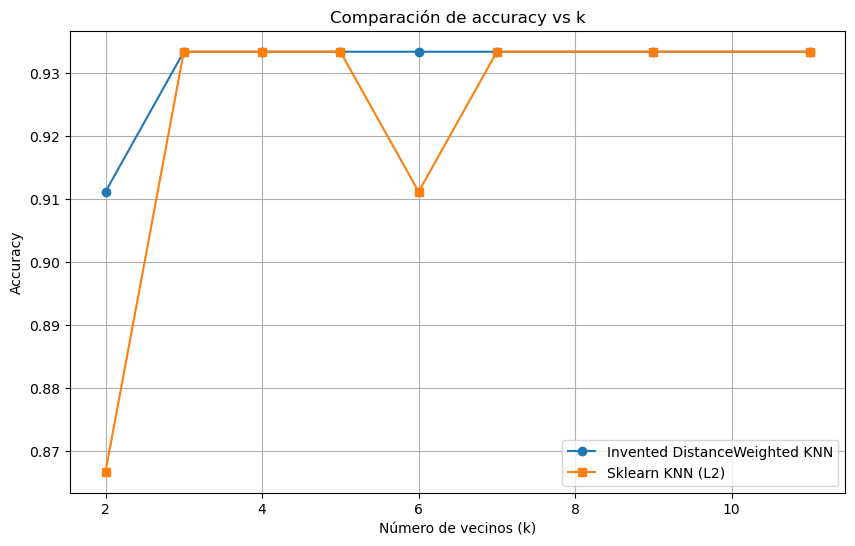

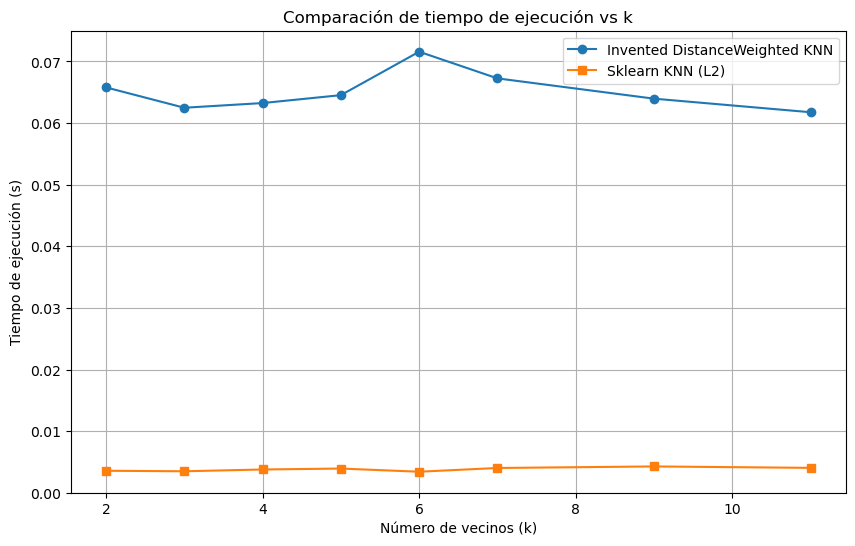

([0.9111111111111111,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333],
 [0.8666666666666667,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333,
  0.9111111111111111,
  0.9333333333333333,
  0.9333333333333333,
  0.9333333333333333])

In [88]:
def evaluate_k_range(k_values=[2, 3, 4, 5, 6, 7, 9, 11], weights="distance"):
    our_accuracies = []
    sklearn_accuracies = []
    our_times = []
    sklearn_times = []

    for k in k_values:
        # Nuestro clasificador
        model = KNearestNeighbors(X_train, y_train, n_neighbors=k, weights=weights)
        start = time.time()
        y_pred = model.predict(X_test)
        end = time.time()
        acc = accuracy_score(y_test, y_pred)
        our_accuracies.append(acc)
        our_times.append(end - start)

        # Clasificador sklearn
        sk_model = KNeighborsClassifier(n_neighbors=k)
        sk_model.fit(X_train, y_train)
        start = time.time()
        sk_pred = sk_model.predict(X_test)
        end = time.time()
        sk_acc = accuracy_score(y_test, sk_pred)
        sklearn_accuracies.append(sk_acc)
        sklearn_times.append(end - start)

        print(f"k={k} | Our accuracy: {acc:.4f} | Sklearn accuracy: {sk_acc:.4f} | Our time: {our_times[-1]:.4f}s | Sklearn time: {sklearn_times[-1]:.4f}s")

    # Graficar resultados
    plt.figure(figsize=(10,6))
    plt.plot(k_values, our_accuracies, marker='o', label='Invented DistanceWeighted KNN')
    plt.plot(k_values, sklearn_accuracies, marker='s', label='Sklearn KNN (L2)')
    plt.xlabel("Número de vecinos (k)")
    plt.ylabel("Accuracy")
    plt.title("Comparación de accuracy vs k")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10,6))
    plt.plot(k_values, our_times, marker='o', label='Invented DistanceWeighted KNN')
    plt.plot(k_values, sklearn_times, marker='s', label='Sklearn KNN (L2)')
    plt.xlabel("Número de vecinos (k)")
    plt.ylabel("Tiempo de ejecución (s)")
    plt.title("Comparación de tiempo de ejecución vs k")
    plt.legend()
    plt.grid(True)
    plt.show()

    return our_accuracies, sklearn_accuracies
evaluate_k_range()

### 4.2 Clasificador de múltiples clase   

1. Cargue el set datos MNIST (dígitos), utilizando la biblioteca sklearn MNIST.  

In [100]:

from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
digits = load_digits(n_class=10)  # no es nclass, es n_class

2. Muestre las primeras 12 imágenes en forma de tabla (3x4). Se debe de observar la imagen
del d´ıgito.

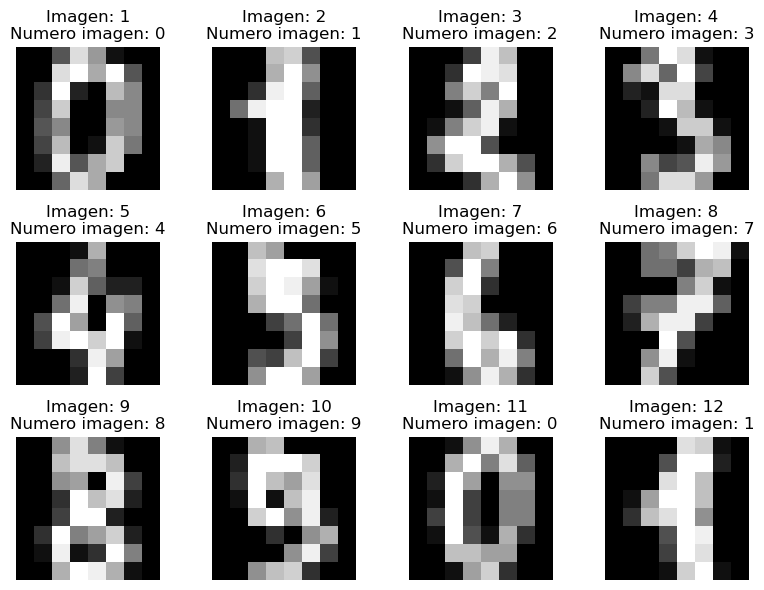

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(8, 6)) # se crea el plot de matriz 4x3

for i, ax in enumerate(axes.flat):             # Se coloca la primeras 12 imagenes (axes.flat retorna numero de celdas)
    ax.imshow(digits.images[i], cmap="gray")
    ax.set_title(f"Imagen: {i+1}\nNumero imagen: {digits.target[i]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

3. Muestre las dimensiones del set datos (cuántos datos y cuántos features).


In [133]:
# digits.data.shape devuelve un par de datos en este caso (1797,64), (# de datos, # de features)
n_data, n_features = digits.data.shape
print("Número de datos   :", n_data)
print("Número de features:", n_features)

Número de datos   : 1797
Número de features: 64


4. Separe el set de datos de tal manera que el 75 % de los datos sea para entrenamiento,
mientras que el 25 % sea para el test.

In [134]:
# Separa en  75% en entranamiento  y 25% en prueba
X = digits.data      # Features (1797, 64)
y = digits.target    # Etiquetas (1797,)

# Separar en train (75%) y test (25%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y #stratify=y asegura que las clases estén balanceadas en ambos conjuntos.
)
print(f"Tamaño datos_entrenamiento: {X_train.shape} ({X_train.shape[0]/n_data*100:.2f}%)")
print(f"Tamaño datos_prueba       : {X_test.shape} ({X_test.shape[0]/n_data*100:.2f}%)")



Tamaño datos_entrenamiento: (1347, 64) (74.96%)
Tamaño datos_prueba       : (450, 64) (25.04%)


5. Instancie su propia implementación de KNN y pruebe el clasificador (k=2,3,5,7,8,10,11)
con el set datos solicitados (note que son 10 clases). Muestre el accuracy con el método
normal y con el método de distancia implementado por cada grupo.


In [135]:
k_values = [2,3,5,7,8,10,11]
results_our_classifier = []
results_sklearn = []

In [136]:

# Llama a nuestra implementacion de KNN con las diferentes K solicitadas
for k in k_values:
    # KNN método distance
    our_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=k, weights='distance')
    acc_distance, _, _ = our_classifier.score(X_test, y_test)
    
    results_our_classifier.append({
        'k': k,
        'Distance': acc_distance
    })

print("=== Resultados Nuestro KNN (Distance) ===")
for r in results_our_classifier:
    print(f"k={r['k']}: Distance={r['Distance']:.4f}")
          

=== Resultados Nuestro KNN (Distance) ===
k=2: Distance=0.9844
k=3: Distance=0.9844
k=5: Distance=0.9800
k=7: Distance=0.9800
k=8: Distance=0.9800
k=10: Distance=0.9778
k=11: Distance=0.9756


6. Instancie el clasificador de sklearn y realice las mismas pruebas que el punto anterior.

In [137]:
# Llama al clasificador de sklearn con las diferentes K solicitadas
for k in k_values:
    sklearn_knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    acc = sklearn_knn.score(X_test, y_test)
    
    results_sklearn.append({
        'k': k,
        'Sklearn': acc
    })

print("\n=== Resultados scikit-learn KNN ===")
for r in results_sklearn:
    print(f"k={r['k']}: Accuracy={r['Sklearn']:.4f}")


=== Resultados scikit-learn KNN ===
k=2: Accuracy=0.9844
k=3: Accuracy=0.9844
k=5: Accuracy=0.9844
k=7: Accuracy=0.9800
k=8: Accuracy=0.9778
k=10: Accuracy=0.9778
k=11: Accuracy=0.9778


7. Compare en una tabla la implementación propia del knn con el de la biblioteca sklearn.

In [138]:

#Se procesan los resultados guardados de los algoritmos anteriores para crear la tabla comparativa
results_our_classifier = [d['Distance'] for d in results_our_classifier]
results_sklearn_clean = [d['Sklearn'] for d in results_sklearn]

df_comparison = pd.DataFrame({
    'k': k_values,
    'Our KNN (distance)': results_our_classifier,
    'Sklearn KNN': results_sklearn_clean
})

print(df_comparison)

    k  Our KNN (distance)  Sklearn KNN
0   2            0.984444     0.984444
1   3            0.984444     0.984444
2   5            0.980000     0.984444
3   7            0.980000     0.980000
4   8            0.980000     0.977778
5  10            0.977778     0.977778
6  11            0.975556     0.977778


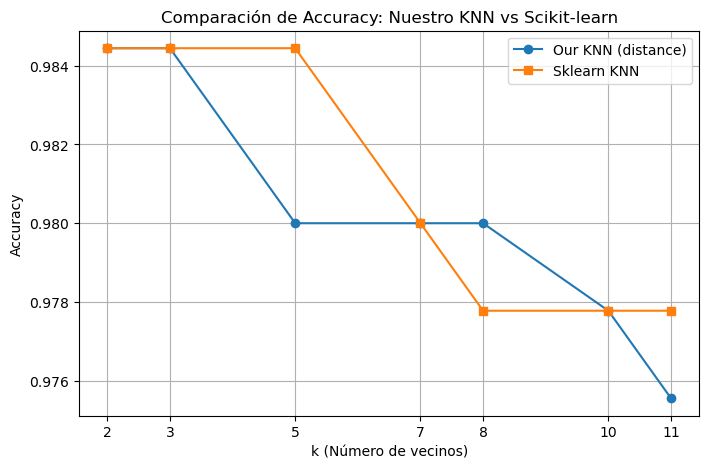

In [139]:
#Se crea un grafico comparativo con los resultados anteriores

plt.figure(figsize=(8,5))
plt.plot(k_values, results_our_classifier, marker='o', label='Our KNN (distance)')
plt.plot(k_values, results_sklearn_clean, marker='s', label='Sklearn KNN')
plt.title('Comparación de Accuracy: Nuestro KNN vs Scikit-learn')
plt.xlabel('k (Número de vecinos)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

8. Realice 5 imágenes con dígitos escrito a mano. Saque una foto a cada dígito y transforme
la imagen a las mismas dimensiones que el set de datos. Pruebe su modelo prediciendo
cada una de las fotos tomadas. Reporte la clasificaci´on que brinda el modelo mostrando la
imagen original y la clasificación obtenida.

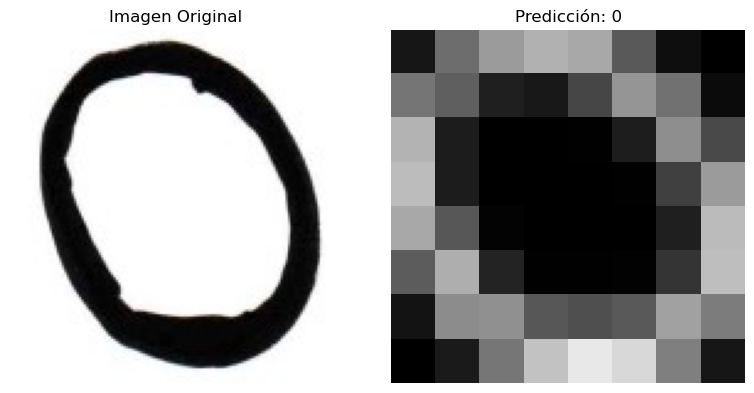

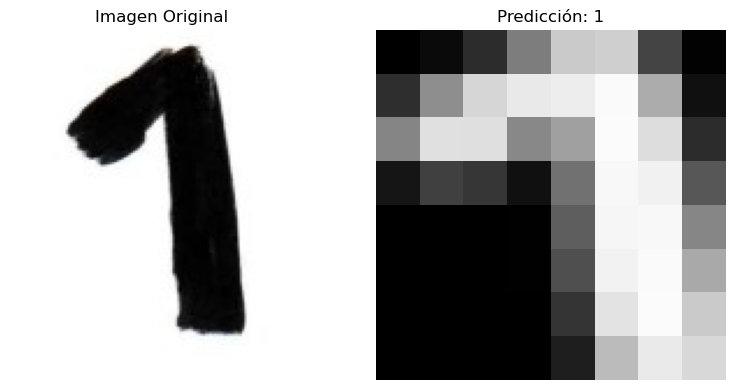

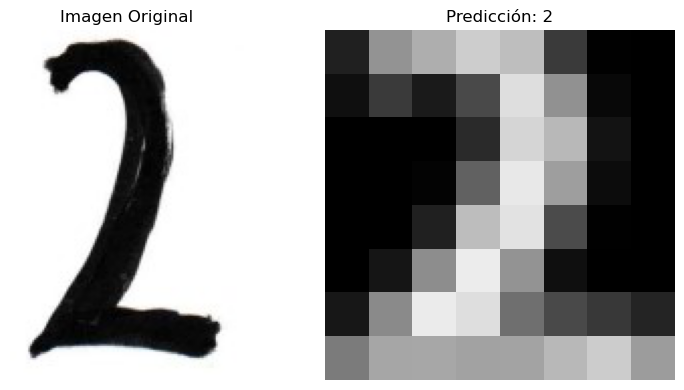

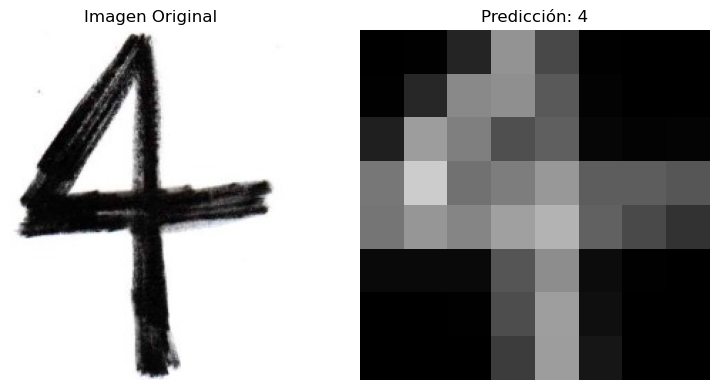

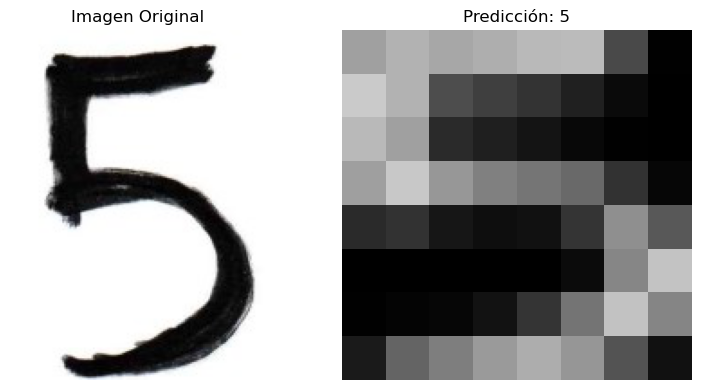

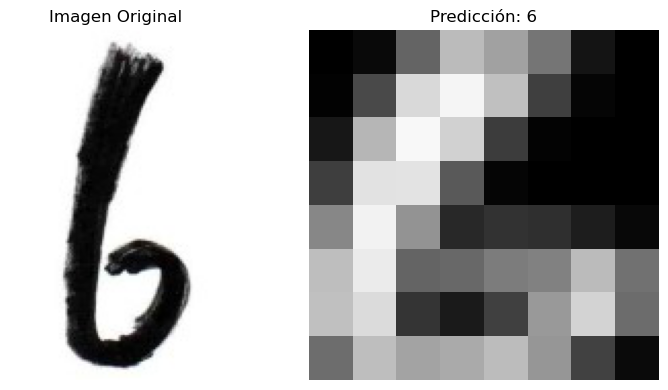

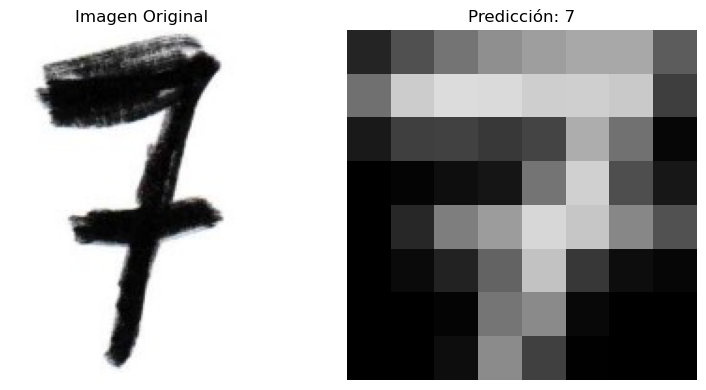

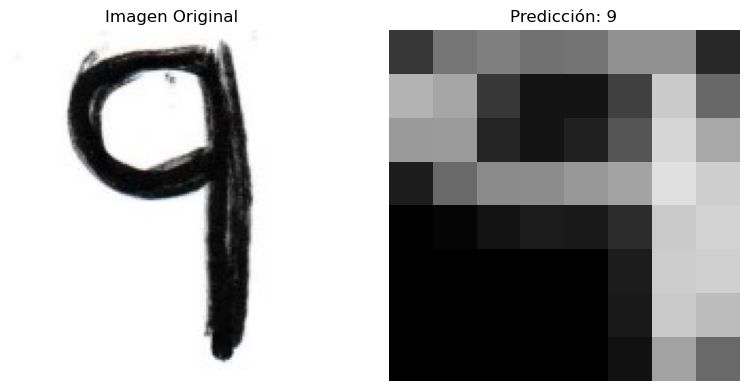

In [163]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform, exposure, measure
from skimage.filters import  gaussian
# Función para procesar la imagen

def procesar_imagen_celular(ruta_imagen):
    img = io.imread(ruta_imagen)
    if len(img.shape) == 3:  # Si es RGB
        img = color.rgb2gray(img)

    # Normalización robusta de contraste
    p2, p98 = np.percentile(img, (2, 98))
    img = exposure.rescale_intensity(img, in_range=(p2, p98))

    # Invertir: ahora el dígito queda blanco y el fondo negro
    img = 1 - img

    # Centrar dígito
    etiquetas = measure.label(img > 0.1)  # píxeles claros (el dígito)
    props = measure.regionprops(etiquetas)
    if props:
        region = max(props, key=lambda r: r.area)
        minr, minc, maxr, maxc = region.bbox
        img = img[minr:maxr, minc:maxc]

    # Redimensionar a 8x8
    img_resized = transform.resize(img, (8, 8), anti_aliasing=True)

    # Escalar como en sklearn digits (0–16 enteros)
    img_flat = (img_resized * 16).astype(int).flatten()

    return img_flat, img_resized


#Se llama al algotimo para entrenarlo y luego predecir
our_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=5, weights='distance') # se escogio el k=3 porque fue el mejor rendimiento en la grafica


folder = 'Images'
# Lista de imágenes en la carpeta actual
archivos = [f for f in os.listdir(folder) if f.endswith(('.png', '.jpg'))]
#Busca las imagenes que esten en la misma carpeta que el archivo
for archivo in archivos:
    img_flat, img_resized = procesar_imagen_celular(os.path.join(folder, archivo))
    pred = our_classifier.predict([img_flat])[0]  # Se realiza con nuestro algoritmo con K=3
    
    img_original = io.imread(os.path.join(folder, archivo))
    
    # Crear figura con 2 subplots
    plt.figure(figsize=(8, 4))

    # Imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(img_original, cmap='gray')
    plt.title("Imagen Original")
    plt.axis('off')

    # Imagen redimensionada / predicción
    plt.subplot(1, 2, 2)
    plt.imshow(img_resized, cmap='gray', vmin=0, vmax=1)
    plt.title(f"Predicción: {pred}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()